#Image classification

Creating an image classifier for the Cifar10 dataset using tensorflow and keras.

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import sys
sys.path.insert(0,"/content/gdrive/MyDrive/data_science_projects/data_science_projects_2022/cifar10_image_classification/modules/")

In [3]:
%load_ext autoreload
%autoreload 2

from import_data import get_data, get_train_test_data, normalise_data
from create_pipeline import create_pipeline
from image_classification_model import create_model, compile_model, compile_model2, train_model
from model_evaluation import evaluate_model, return_confusion_matrix
from model_details import model_summary, plot_metrics

from tensorflow.keras.layers import Conv2D, Dense, Input, Flatten, Dropout, MaxPooling2D
from tensorflow import keras


In [ ]:
def main ():
    def set_function_parameters (model_layers = {}, compiler_settings = {}, fit_settings = {}, evaluation_settings = {}):
        from tensorflow.keras.datasets import cifar10

        data_model = create_pipeline ([get_data, 
                                       get_train_test_data,
                                       normalise_data, 
                                       create_model (**model_layers), 
                                       compile_model2 (**compiler_settings), 
                                       train_model (**fit_settings), 
                                       evaluate_model (**evaluation_settings),
                                       return_confusion_matrix (),
                                       plot_metrics
                                       ])
        
        data_n_model = data_model (cifar10)

        return data_n_model
    
    return set_function_parameters

Model compiled for compile_model2
Start model training.
Epoch 1/5
1250/1250 [==============================] - 140s 112ms/step - loss: 1.7289 - sparse_categorical_accuracy: 0.3710 - val_loss: 1.3796 - val_sparse_categorical_accuracy: 0.5216
Epoch 2/5
1250/1250 [==============================] - 140s 112ms/step - loss: 1.4236 - sparse_categorical_accuracy: 0.4827 - val_loss: 1.2378 - val_sparse_categorical_accuracy: 0.5552
Epoch 3/5
1250/1250 [==============================] - 139s 111ms/step - loss: 1.3198 - sparse_categorical_accuracy: 0.5258 - val_loss: 1.1349 - val_sparse_categorical_accuracy: 0.6138
Epoch 4/5
1250/1250 [==============================] - 140s 112ms/step - loss: 1.2390 - sparse_categorical_accuracy: 0.5556 - val_loss: 1.0741 - val_sparse_categorical_accuracy: 0.6227
Epoch 5/5
1250/1250 [==============================] - 137s 110ms/step - loss: 1.1741 - sparse_categorical_accuracy: 0.5784 - val_loss: 1.0562 - val_sparse_categorical_accuracy: 0.6311
Completed model tra

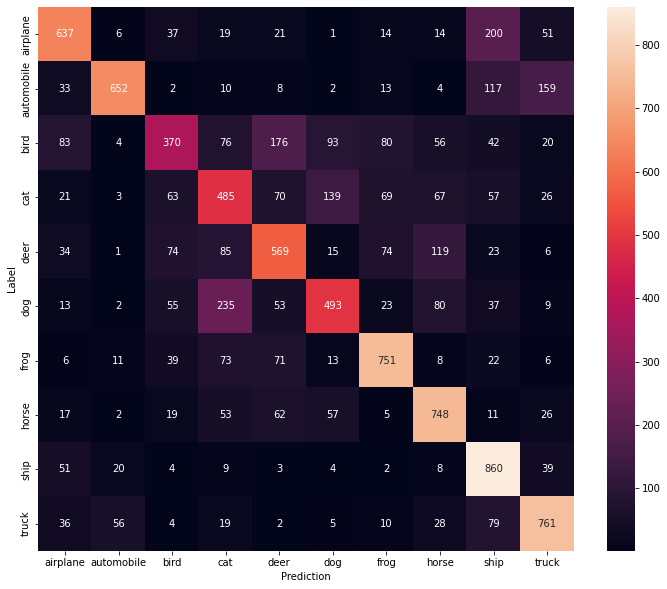

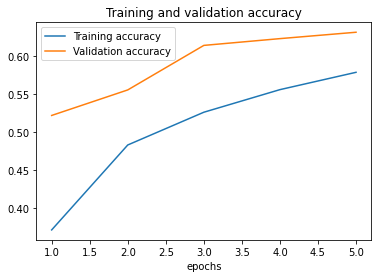

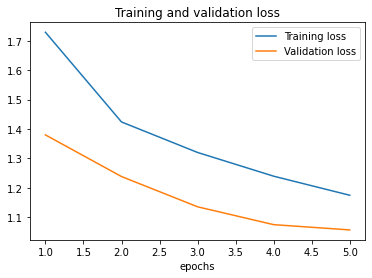

In [ ]:
test_run = main () (model_layers = {'input_layer': Input (shape = (32, 32, 3)),
                                    'hidden_layers': [Conv2D (32, kernel_size = (3, 3), activation = "relu"),
                                                    Conv2D (64, kernel_size = (3, 3), activation = "relu"),
                                                    MaxPooling2D (pool_size = (2, 2)),
                                                    Dropout (0.25),
                                                    Flatten (),
                                                    Dense (64, activation = "relu"),
                                                    Dropout (0.5),
                                                    Dense (10, activation = "softmax")
                                                    ]
                                    },
                    compiler_settings = {'optimizer': "Adam",
                                         'loss': "sparse_categorical_crossentropy",
                                         'metrics': ["sparse_categorical_accuracy"]
                                         },
                    fit_settings = {'batch_size': 32,
                                    'epochs': 5,
                                    'validation_split': 0.2
                                    }
                    )

This function runs automatically once the parameters are set.

In [ ]:
def main2 ():
    '''Create pipeline.'''
    def set_function_parameters (model_layers = {}, compiler_settings = {}, fit_settings = {}, evaluation_settings = {}):
        '''Set model parametres.'''
        def run_pipeline ():
            '''Delay running pipeline until function is called.'''
            from tensorflow.keras.datasets import cifar10

            data_model = create_pipeline ([get_data,
                                           get_train_test_data,
                                           normalise_data,
                                           create_model (**model_layers),
                                           compile_model2 (**compiler_settings),
                                           train_model (**fit_settings),
                                           evaluate_model (**evaluation_settings),
                                           return_confusion_matrix (),
                                           plot_metrics
                                           ])
            
            data_n_model = data_model (cifar10)

            return data_n_model
        
        return run_pipeline
    
    return set_function_parameters

In [ ]:
test_run2 = main2 () (model_layers = {'input_layer': Input (shape = (32, 32, 3)),
                                      'hidden_layers': [Conv2D (32, kernel_size = (3, 3), activation = "relu"),
                                                        Conv2D (64, kernel_size = (3, 3), activation = "relu"),
                                                        MaxPooling2D (pool_size = (2, 2)),
                                                        Dropout (0.25),
                                                        Flatten (),
                                                        Dense (64, activation = "relu"),
                                                        Dropout (0.5),
                                                        Dense (10, activation = "softmax")
                                                        ]
                                      },
                      compiler_settings = {'optimizer': "Adam",
                                           'loss': "sparse_categorical_crossentropy",
                                           'metrics': ["sparse_categorical_accuracy"]
                                           },
                      fit_settings = {'batch_size': 32,
                                      'epochs': 5,
                                      'validation_split': 0.2
                                      }
                      )

In [ ]:
type (test_run2)

function

In [ ]:
def run_function (func):
    func ()

Model compiled for compile_model2
Start model training.
Epoch 1/5
1250/1250 [==============================] - 139s 111ms/step - loss: 1.7902 - sparse_categorical_accuracy: 0.3359 - val_loss: 1.4908 - val_sparse_categorical_accuracy: 0.4844
Epoch 2/5
1250/1250 [==============================] - 139s 111ms/step - loss: 1.5331 - sparse_categorical_accuracy: 0.4362 - val_loss: 1.3202 - val_sparse_categorical_accuracy: 0.5526
Epoch 3/5
1250/1250 [==============================] - 139s 111ms/step - loss: 1.4125 - sparse_categorical_accuracy: 0.4814 - val_loss: 1.1765 - val_sparse_categorical_accuracy: 0.5870
Epoch 4/5
1250/1250 [==============================] - 142s 113ms/step - loss: 1.3367 - sparse_categorical_accuracy: 0.5123 - val_loss: 1.1249 - val_sparse_categorical_accuracy: 0.6156
Epoch 5/5
1250/1250 [==============================] - 141s 112ms/step - loss: 1.2815 - sparse_categorical_accuracy: 0.5318 - val_loss: 1.1095 - val_sparse_categorical_accuracy: 0.6239
Completed model tra

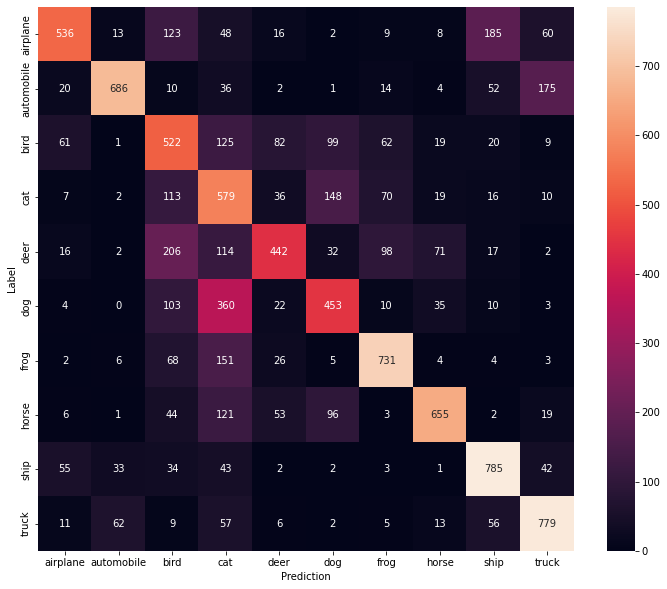

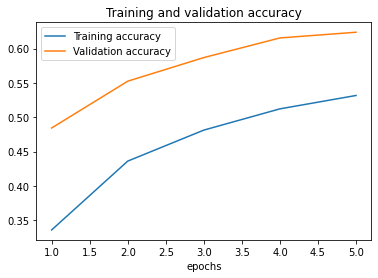

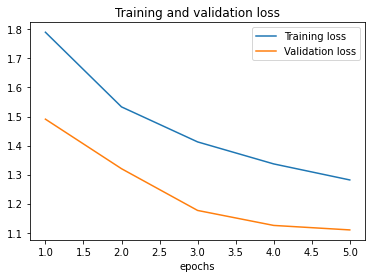

In [ ]:
run_function (test_run2)

### Changing main function
Changing main function to follow more appropriate programming format, i.e. not defining functions inside a main function.

In [4]:
def create_model_pipeline (model_layers = {}, compiler_settings = {}, fit_settings = {}, evaluation_settings = {}):
    '''Create pipeline and set model parametres.'''
    def run_pipeline ():
        '''Delay running pipeline until function is called.'''
        from tensorflow.keras.datasets import cifar10

        data_model = create_pipeline ([get_data,
                                       get_train_test_data,
                                       normalise_data,
                                       create_model (**model_layers),
                                       compile_model2 (**compiler_settings),
                                       train_model (**fit_settings),
                                       evaluate_model (**evaluation_settings),
                                       return_confusion_matrix (),
                                       plot_metrics
                                       ])
        
        data_n_model = data_model (cifar10)

        return data_n_model
    
    return run_pipeline

In [5]:
def run_function (func):
    func ()

In [6]:
def main ():
    model1 = create_model_pipeline (model_layers = {'input_layer': Input (shape = (32, 32, 3)),
                                                    'hidden_layers': [Conv2D (32, kernel_size = (3, 3), activation = "relu"),
                                                                      Conv2D (64, kernel_size = (3, 3), activation = "relu"),
                                                                      MaxPooling2D (pool_size = (2, 2)),
                                                                      Dropout (0.25),
                                                                      Flatten (),
                                                                      Dense (64, activation = "relu"),
                                                                      Dropout (0.5),
                                                                      Dense (10, activation = "softmax")
                                                                      ]
                                                    },
                                    compiler_settings = {'optimizer': "Adam",
                                                         'loss': "sparse_categorical_crossentropy",
                                                         'metrics': ["sparse_categorical_accuracy"]
                                                         },
                                    fit_settings = {'batch_size': 32,
                                                    'epochs': 5,
                                                    'validation_split': 0.2
                                                    }
                                    )
    
    run_function (model1)

170508288/170498071 [==============================] - 4s 0us/step
Model compiled for compile_model2
Start model training.
Epoch 1/5
1250/1250 [==============================] - 131s 104ms/step - loss: 1.7038 - sparse_categorical_accuracy: 0.3750 - val_loss: 1.3602 - val_sparse_categorical_accuracy: 0.5214
Epoch 2/5
1250/1250 [==============================] - 130s 104ms/step - loss: 1.4137 - sparse_categorical_accuracy: 0.4904 - val_loss: 1.2237 - val_sparse_categorical_accuracy: 0.5640
Epoch 3/5
1250/1250 [==============================] - 130s 104ms/step - loss: 1.2968 - sparse_categorical_accuracy: 0.5382 - val_loss: 1.1434 - val_sparse_categorical_accuracy: 0.6106
Epoch 4/5
1250/1250 [==============================] - 130s 104ms/step - loss: 1.2167 - sparse_categorical_accuracy: 0.5634 - val_loss: 1.0714 - val_sparse_categorical_accuracy: 0.6307
Epoch 5/5
1250/1250 [==============================] - 130s 104ms/step - loss: 1.1583 - sparse_categorical_accuracy: 0.5875 - val_loss: 1

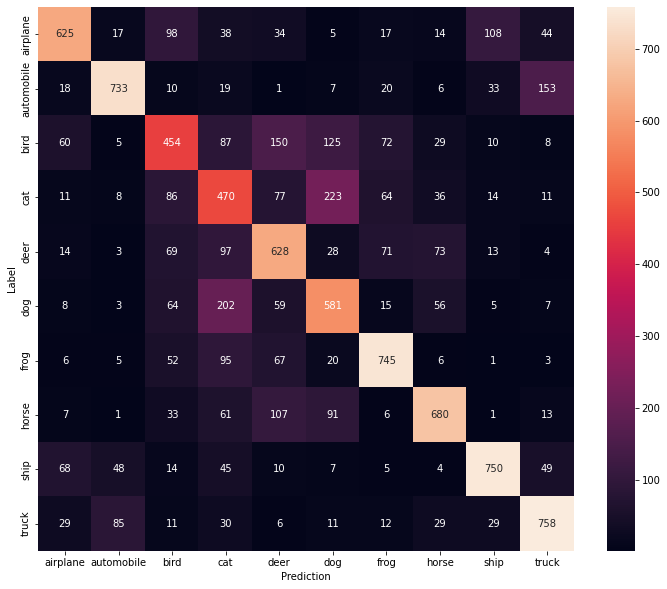

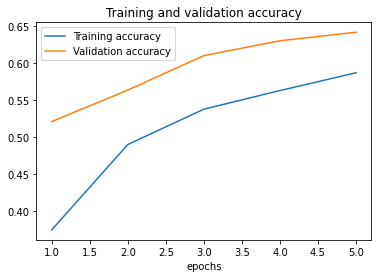

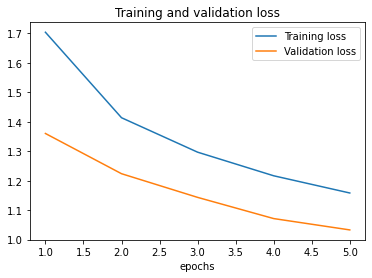

In [7]:
main ()